# Linear Regression Project Template

This notebook aims to be an example and template that can be used for future data science projects that have follow a similar format.

---

During the introduction you should frame the problem, the data, and provide some general background. Try to talk about the real-world context of the problem you're trying to solve and how you'll measure performance.

In this example I'll be using a [house prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) from Kaggle.

## Contents

Be sure to provide a contents section and ideally link it to the document so readers can quickly jump to their area of interest.  
- Data Collection
- Data Exploration
- Data Preparation
- Data Modelling
- Model Tuning
- Solution

### Data Collection
Depending on your project this section will vary a large amount. Whether you're doing some complicated web-scraping or simply downloading an online dataset, take some time to explain the data.

In [1]:
# You might need to use some of the below packages
import pandas as pd
# import requests
# from bs4 import beautifulsoup

In [10]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [11]:
# A quick high-level check of the data is always helpful to make sure you're getting what you expected
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Exploration
This is likely to be the longest and most detailed part of the project. You are looking to explore each attribute of the data and all of the characteristics. Using visualisations and thorough analysis you should seek out correlations and consider how to solve the problem manually. Try to identify promising transformations you may apply and think about any extra data that might be useful.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

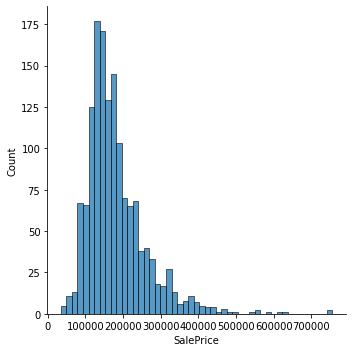

In [18]:
# Plot the distribution of the target variable
sns.displot(train_df['SalePrice'])

For regression problems it is often beneficial to scale or transform both the feature and target variables to be normally distributed. In our example most of the target variable data appears on the left side so we'll use scikit-learn to transform the data. Remember to invert the transform before making any predictions!

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
target_scaler = MinMaxScaler()
target_scaler.fit(train_df.SalePrice)

ValueError: Expected 2D array, got 1D array instead:
array=[208500. 181500. 223500. ... 266500. 142125. 147500.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
x = train_df.SalePrice.to_numpy().reshape(-1, 1)

In [36]:
target_scaler.fit(x)

MinMaxScaler()